https://colab.research.google.com/drive/1tJRvXcGhvtfb-lJpu6aVCnzBKxQ3CEhs?usp=sharing

In [19]:
import warnings
# Suprimir todos los warnings
warnings.filterwarnings('ignore')

In [20]:
# Manipular datos
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/Joseve-Sebastian/Unidad-4/refs/heads/main/Student_Performance_new.csv')  # en github se sube el .csv y luego le picas y donde dice "Raw" le das click y copias el link de ese

df.drop(columns=['Unnamed: 0'], inplace=True)

df.columns

Index(['etnia', 'nivel_educativo_de_los_padres', 'tipo_de_comida',
       'curso_de_preparación_para_el_examen', 'porcentaje_de_matematicas',
       'porcentaje_de_lectura', 'porcentaje_de_escritura', 'sexo'],
      dtype='object')

In [21]:
df['promedio'] = (df['porcentaje_de_matematicas'] + df['porcentaje_de_lectura'] + df['porcentaje_de_escritura']) / 3

df

,etnia,nivel_educativo_de_los_padres,tipo_de_comida,curso_de_preparación_para_el_examen,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,sexo,promedio
0,group_B,licenciatura,estandar,nada,0.72,0.72,0.74,mujer,0.726667
1,group_C,algo_de_universidad,estandar,completado,0.69,0.90,0.88,mujer,0.823333
2,group_B,maestria,estandar,nada,0.90,0.95,0.93,mujer,0.926667
3,group_A,tecnico_asociado,subsidiado,nada,0.47,0.57,0.44,hombre,0.493333
4,group_C,algo_de_universidad,estandar,nada,0.76,0.78,0.75,hombre,0.763333
...,...,...,...,...,...,...,...,...,...
995,group_E,maestria,estandar,completado,0.88,0.99,0.95,mujer,0.940000
996,group_C,preparatoria,subsidiado,nada,0.62,0.55,0.55,hombre,0.573333
997,group_C,preparatoria,subsidiado,completado,0.59,0.71,0.65,mujer,0.650000
998,group_D,algo_de_universidad,estandar,completado,0.68,0.78,0.77,mujer,0.743333


# nivel_educativo_de_los_padres

In [22]:
df['nivel_educativo_de_los_padres'].unique()

array(['licenciatura', 'algo_de_universidad', 'maestria',
       'tecnico_asociado', 'preparatoria', 'algo_de_preparatoria'],
      dtype=object)

In [23]:
# Si todos los grupos tienen una distribución normal
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['nivel_educativo_de_los_padres'] == 'licenciatura']['promedio'],
    df[df['nivel_educativo_de_los_padres'] == 'algo_de_universidad']['promedio'],
    df[df['nivel_educativo_de_los_padres'] == 'maestria']['promedio'],
    df[df['nivel_educativo_de_los_padres'] == 'tecnico_asociado']['promedio'],
    df[df['nivel_educativo_de_los_padres'] == 'preparatoria']['promedio'],
    df[df['nivel_educativo_de_los_padres'] == 'algo_de_preparatoria']['promedio'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 10.75
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0337 0.1509 -0.0061 0.0735  False
algo_de_preparatoria        licenciatura   0.0682 0.0006   0.021 0.1153   True
algo_de_preparatoria            maestria   0.0849 0.0007  0.0252 0.1446   True
algo_de_preparatoria        preparatoria  -0.0201 0.7288 -0.0612  0.021  False
algo_de_preparatoria    tecnico_asociado   0.0446 0.0183  0.0047 0.0845   True
 algo_de_universidad        licenciatura   0.0345 0.2479 -0.0107 0.0796  False
 algo_de_universidad            maestria   0.0512 0.1201 -0.0069 0.1093  False
 algo_de_universidad        preparatoria  -0.0538 0.0011 -0.0926 -0.015   True
 algo_de_universidad    tecnico_asociado   0.0109 0.9618 -0.0266 0.0485  False
        licenciatura            maestria   0.0168 0.

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

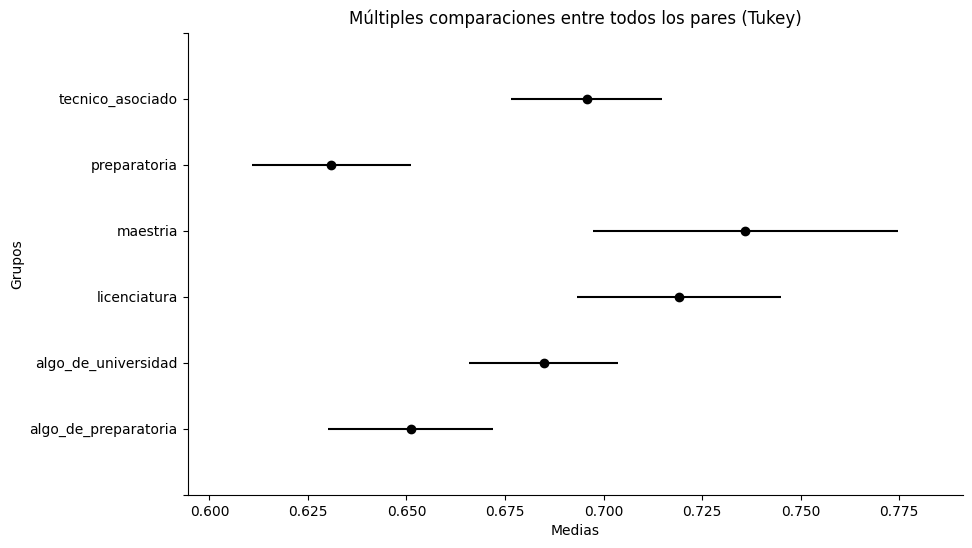

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['nivel_educativo_de_los_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")


si hay diferencia significativa ya que las graficas salen algo dispersar, si no hubiera diferencia significativa las lineas saldrian pegadas, ( el nivel de los padres si influye)

# etnia

In [25]:
df['etnia'].unique()

array(['group_B', 'group_C', 'group_A', 'group_D', 'group_E'],
      dtype=object)

In [26]:
nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['etnia'] == 'group_B']['promedio'],
    df[df['etnia'] == 'group_C']['promedio'],
    df[df['etnia'] == 'group_A']['promedio'],
    df[df['etnia'] == 'group_D']['promedio'],
    df[df['etnia'] == 'group_E']['promedio'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 9.10
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0248 0.6447 -0.0245  0.074  False
group_A group_C   0.0414 0.1006 -0.0046 0.0874  False
group_A group_D   0.0619 0.0031  0.0148 0.1089   True
group_A group_E   0.0976    0.0  0.0456 0.1496   True
group_B group_C   0.0166 0.6953 -0.0185 0.0518  False
group_B group_D   0.0371 0.0445  0.0006 0.0736   True
group_B group_E   0.0728    0.0  0.0301 0.1155   True
group_C group_D   0.0205 0.4036 -0.0115 0.0524  False
group_C group_E   0.0562 0.0008  0.0173 0.0951   True
group_D group_E   0.0357 0.1076 -0.0044 0.0759  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

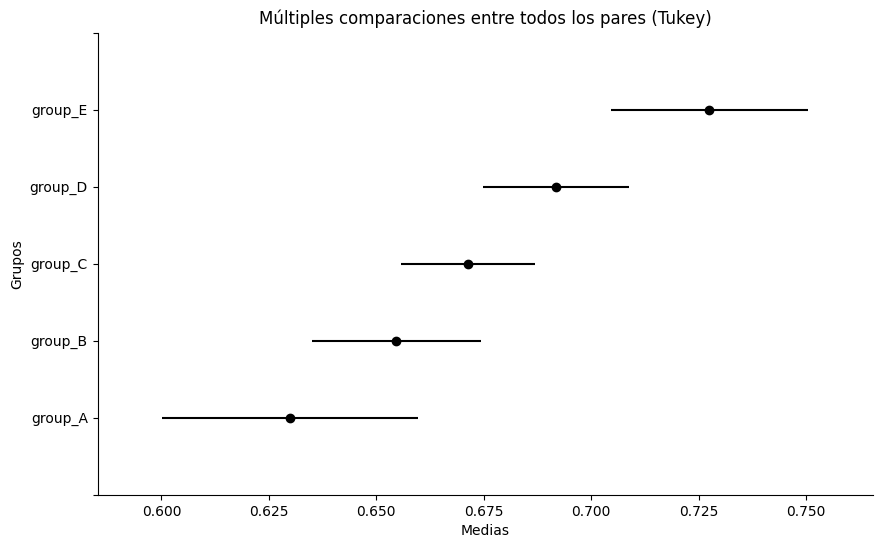

In [27]:
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['etnia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

la etnia si influye

# curso_de_preparación_para_el_examen

In [28]:
df['curso_de_preparación_para_el_examen'].unique()

array(['nada', 'completado'], dtype=object)

In [29]:
nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['curso_de_preparación_para_el_examen'] == 'nada']['promedio'],
    df[df['curso_de_preparación_para_el_examen'] == 'completado']['promedio'],


)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 70.41
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0763   0.0 -0.0942 -0.0585   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

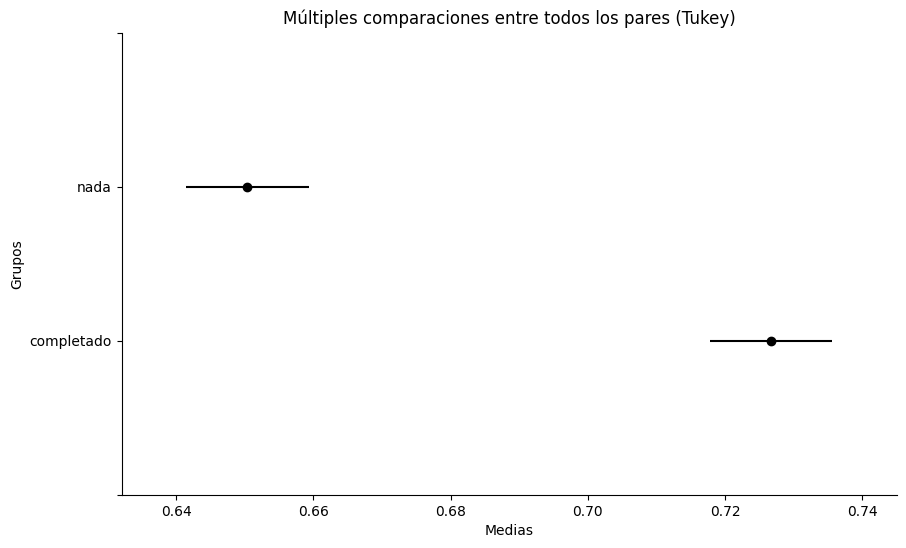

In [30]:
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['curso_de_preparación_para_el_examen'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

el curso_de_preparación_para_el_examen si influye

# sexo

In [31]:
df['sexo'].unique()

array(['mujer', 'hombre'], dtype=object)

In [32]:
nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['sexo'] == 'mujer']['promedio'],
    df[df['sexo'] == 'hombre']['promedio'],


)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 17.39
Valor p: 0.00003

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
hombre  mujer   0.0373   0.0 0.0198 0.0549   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

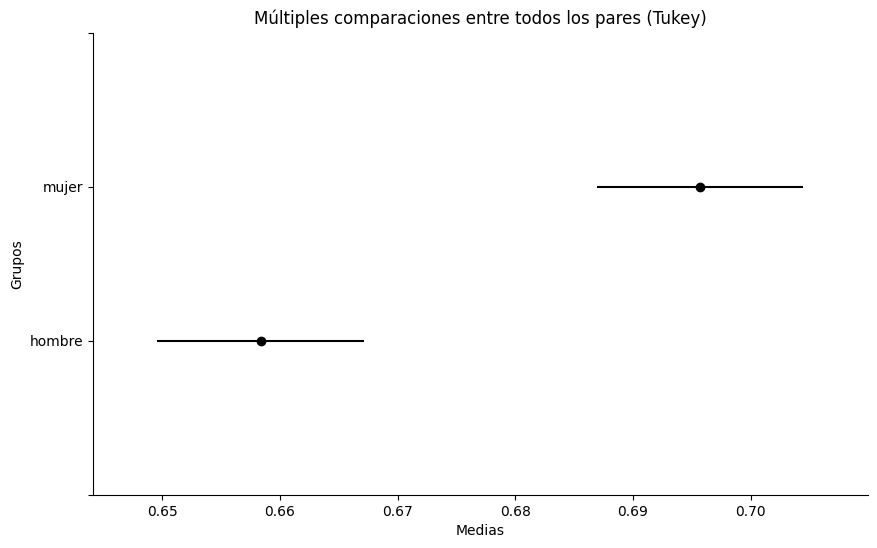

In [33]:
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['sexo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

si influye

# tipo_de_comida

In [34]:
df['tipo_de_comida'].unique()

array(['estandar', 'subsidiado'], dtype=object)

In [35]:
nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tipo_de_comida'] == 'estandar']['promedio'],
    df[df['tipo_de_comida'] == 'subsidiado']['promedio'],


)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")

Resultados del ANOVA:
F-Estadístico: 91.68
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos tratamientos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado  -0.0864   0.0 -0.1041 -0.0687   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

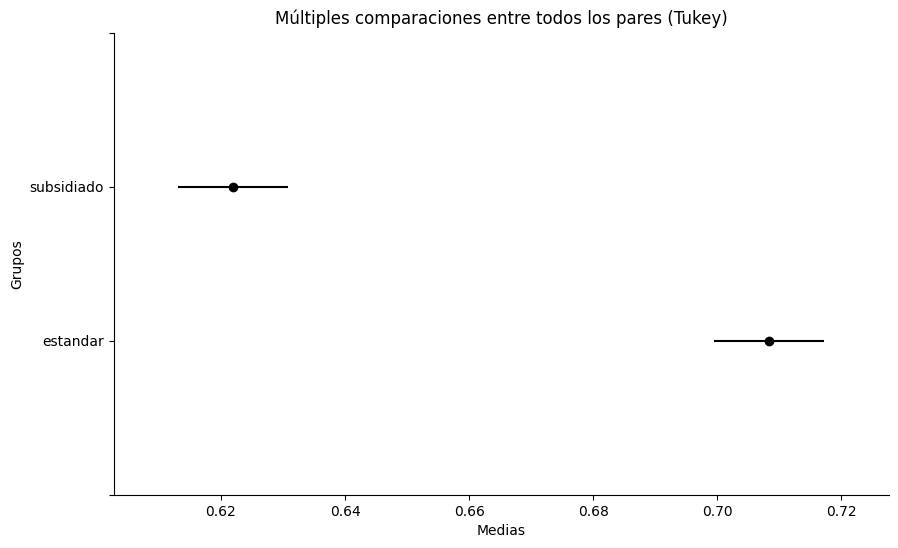

In [36]:
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['tipo_de_comida'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

si influye

# Conclusion

Tomando en cuenta todas las pruebas Tukey realizadas se puede decir que todas las variables analizadas si influyen de una manera significativa en la variable con la que se esta comparando que en este caso es el promedio